In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Zadanie dodatkowe
    Korzystając z metody delta, wyznaczyć granice punktowo asymptotycznego przedziału ufności dla prawdopodobieństwa sukcesu, bazując na przekształceniu logit lub probit lub cloglog. Następnie, dla konkretnych danych, wyznaczyć realizację wyznaczonego przedziału i porównać z odpowiednią realizacją przedziału uzyskanego przy wykorzystaniu 
    funkcji *binom.confint pakietu* R.

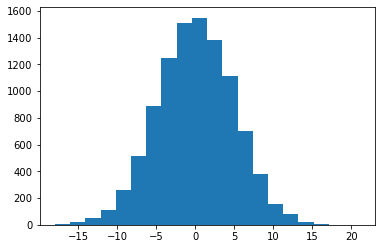

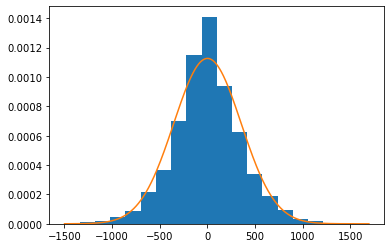

50.0 4.997987931157897 354.17411378458326


In [31]:
n = 100
p=0.5
x = np.random.rand(10000) - 1/2

x = np.random.binomial(n,p,10000) -n*p
mu = n*p
sig = np.std(x)
plt.hist(x,bins =20)
plt.show()
y = [ i**(1/2)*x[i] for i in range(len(x))]
xs = np.linspace(min(y),max(y),1000)
ys = norm(loc = 0,scale = np.std(y)).pdf(xs)
plt.hist(y, bins =20, density = True)
plt.plot(xs,ys)
plt.show()
sigma = np.std(y)
print(mu,sig,sigma)

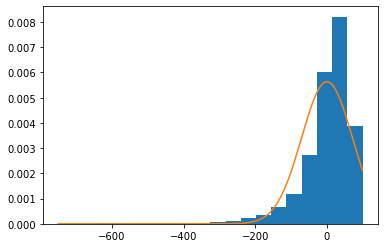

In [3]:
x = np.random.rand(10000)
mu = np.mean(np.log(x))
x = np.log(x)
sig = np.std(x)
# sig = np.std(x)
y = [ i**(1/2)*(x[i] - mu) for i in range(len(x))]
xs = np.linspace(min(y),max(y),1000)
ys = norm(loc = 0,scale = np.std(y)).pdf(xs)
plt.hist(y, bins =20, density = True)
plt.plot(xs,ys)
plt.show()

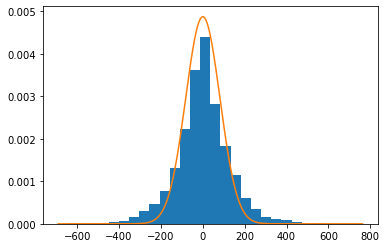

128.47244548489348 20.47301869082575 81.892074763303


In [4]:
def logit(x):
    return np.log(x/(1-x))

def dxlogit(x):
    return 1/(x-x**2)

x = np.random.rand(10000)
sig1 = np.std([ i**(1/2)*(x[i]-1/2) for i in range(len(x))])
mu = logit(1/2)
x = logit(x)
sig = np.std(x)
# sig = np.std(x)
y = [ i**(1/2)*(x[i] - mu) for i in range(len(x))]
xs = np.linspace(min(y),max(y),1000)
ys = norm(loc = 0, scale = dxlogit(1/2)*sig1).pdf(xs)
plt.hist(y, bins =30, density = True)
plt.plot(xs,ys)
plt.show()
print(np.std(y),sig1,dxlogit(1/2)*sig1)

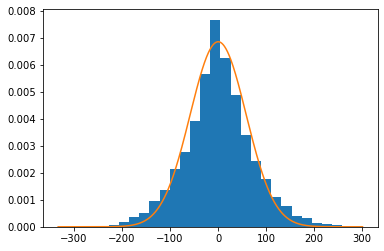

71.17890813799318 20.51072277522037 58.25828678934883


In [5]:
def probit(p):
    ns= np.linspace(-6,6,1000)
    xs = norm(loc = 0, scale = 1).cdf(ns)
    bs = (p<=xs)
    return min(ns[bs])

def dxprobit(x):
    return 1/norm(loc = 0, scale = 1).pdf(x)

x = np.random.rand(10000)
sig1 = np.std([ i**(1/2)*(x[i]-1/2) for i in range(len(x))])
mu = probit(1/2)
x = [probit(i) for i in x]
sig = np.std(x)
sig = np.std(x)

y = [ i**(1/2)*(x[i] - mu) for i in range(len(x))]
xs = np.linspace(min(y),max(y),1000)
ys = norm(loc = 0, scale = dxprobit(1/2)*sig1).pdf(xs)
plt.hist(y, bins =30, density = True)
plt.plot(xs,ys)
plt.show()

print(np.std(y),sig1,dxprobit(1/2)*sig1)

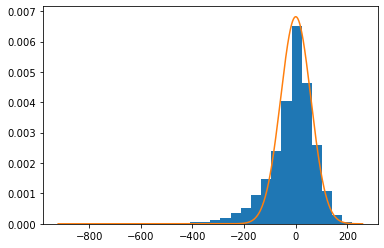

90.37285482759167 20.285279157672523 58.530943287644796


In [6]:
def cloglog(x):
    return np.log(-np.log(1-x))

def dxcloglog(x):
    return -1/((1-x)*np.log(1-x))

x = np.random.rand(10000)
sig1 = np.std([ i**(1/2)*(x[i]-1/2) for i in range(len(x))])
mu = cloglog(1/2)
x = [cloglog(i) for i in x]
sig = np.std(x)
sig = np.std(x)

y = [ i**(1/2)*(x[i] - mu) for i in range(len(x))]
xs = np.linspace(min(y),max(y),1000)
ys = norm(loc = 0, scale = dxcloglog(1/2)*sig1).pdf(xs)
plt.hist(y, bins = 30, density = True)
plt.plot(xs,ys)
plt.show()

print(np.std(y),sig1,dxcloglog(1/2)*sig1)